Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# 1. Подготовка данных

In [1]:
#importing libraries

import pandas as pd
import numpy as np
#preprocessing data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Чтобы использовать данные ,нужно определиться с признаками которые хотим использовать(сразу видно бесполезные для нас колонки: rownumber , customerid, surname) и ,если нужные категориальные признаки - предобработать их прямым или порядковым кодированием. Также провести масштабирование , так как численные колонки находятся в савершенно разных масштабах</h4>

# 2. Исследование задачи

In [5]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
RowNumber          9091 non-null int64
CustomerId         9091 non-null int64
Surname            9091 non-null object
CreditScore        9091 non-null int64
Geography          9091 non-null object
Gender             9091 non-null object
Age                9091 non-null int64
Tenure             9091 non-null float64
Balance            9091 non-null float64
NumOfProducts      9091 non-null int64
HasCrCard          9091 non-null int64
IsActiveMember     9091 non-null int64
EstimatedSalary    9091 non-null float64
Exited             9091 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


В итоге понял ,что тетрадку свою локальную закачать не могу , а ячейки надо запустить. Смог открыть на сервере датасет с пропусками , посмотрел пропуски по графикам и подумав , мне кажется ,что заполнить их какой-то логикой здесь невозможно , Ни зарплата , Ни кредит , Ни возрастная группа не показала какого-то влияния , везде есть абсолютно разные случаи кол-во недвижимости . Возможно можно там притянуть зауши какую-то зависимость и на основе нее заполнить значения , но мне кажется ,что это будет искажением данных и скажется иначе на модели. Поэтому решил просто избавиться от данных строк. В связи с этим немного данные по наблюдениям изменились ,но в целом в лучшую сторону , хотя на тренировочных и валидационных результат не так однозначен и в чем-то лучше стал , в чем-то хуже стал

In [6]:
#did OHE encoding oh Geography and Gender
print(data['Geography'].value_counts())
print(data['Gender'].value_counts())

data_ohe = pd.get_dummies(data, columns = ['Geography', 'Gender'], drop_first = True)

France     4550
Germany    2293
Spain      2248
Name: Geography, dtype: int64
Male      4974
Female    4117
Name: Gender, dtype: int64


In [7]:
#we dont actually need first 3 columns so we can drop them as well
df = data_ohe.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [8]:
# splitting into 3 sets train, test, valid
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 42)
test_df, valid_df = train_test_split(test_df, test_size = 0.5, random_state = 42)

In [9]:
#features
features_train = train_df.drop('Exited', axis = 1)
features_valid = valid_df.drop('Exited', axis = 1)
features_test = test_df.drop('Exited', axis = 1)
#target
target_train = train_df['Exited']
target_valid = valid_df['Exited']
target_test = test_df['Exited']

In [10]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary',]
#numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])


features_train[numeric] = scaler.transform(features_train[numeric])

features_valid[numeric] = scaler.transform(features_valid[numeric])

features_test[numeric] = scaler.transform(features_test[numeric]);

Сделал сверху махинации с колонкой ,так как , если этого не делать ,то scaler будет выдавать массив ,вместо DataFrame и ,когда потребуется применить sample в задаче с дисбалансом - будет ошибка

In [11]:
#function that will return DataFrame with all model's stats
def modelStats(model, sett):
    if sett == 'test':
        probability = model.predict_proba(features_test)[:,1]
        prediction = model.predict(features_test)
        predicted_valid = pd.Series(prediction)
        class_frequency = predicted_valid.value_counts(normalize=True)
        d = {'AUC_ROC': [roc_auc_score(target_test, probability)],\
                 'F1': [f1_score(target_test, prediction)],\
                 'Accuracy': [model.score(features_test, target_test)],\
                 'Precision': [precision_score(target_test, prediction)],\
                 'Recall': [recall_score(target_test, prediction)]}
        scores = pd.DataFrame(data = d)
    elif sett == 'valid':
        probability = model.predict_proba(features_valid)[:,1]
        prediction = model.predict(features_valid)
        predicted_valid = pd.Series(prediction)
        class_frequency = predicted_valid.value_counts(normalize=True)
        d = {'AUC_ROC': [roc_auc_score(target_valid, probability)],\
                 'F1': [f1_score(target_valid, prediction)],\
                 'Accuracy': [model.score(features_valid, target_valid)],\
                 'Precision': [precision_score(target_valid, prediction)],\
                 'Recall': [recall_score(target_valid, prediction)]}
        scores = pd.DataFrame(data = d)
    return scores

In [12]:
#training models
forestModel = RandomForestClassifier(random_state = 42)
forestModel.fit(features_train, target_train)

treeModel = DecisionTreeClassifier(random_state = 42)
treeModel.fit(features_train, target_train)

logisModel = LogisticRegression(random_state = 42, solver='liblinear')
logisModel.fit(features_train, target_train)

#imbalanced target feature in DataFrame
print(df['Exited'].value_counts())

0    7237
1    1854
Name: Exited, dtype: int64


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
statsRFC_disbalance = modelStats(forestModel, 'valid')
print('Random Forest Classifier')
statsRFC_disbalance['balance'] = 'дисбаланс'
statsRFC_disbalance

Random Forest Classifier


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.803945,0.536471,0.855572,0.74026,0.420664,дисбаланс


In [14]:
statsDTC_disbalance = modelStats(treeModel, 'valid')
print('Decision Tree Classifier')
statsDTC_disbalance['balance'] = 'дисбаланс'
statsDTC_disbalance

Decision Tree Classifier


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.672164,0.472924,0.785924,0.462898,0.483395,дисбаланс


In [15]:
statsLR_disbalance = modelStats(logisModel, 'valid')
print('Logistic Regression')
statsLR_disbalance['balance'] = 'дисбаланс'
statsLR_disbalance

Logistic Regression


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.745141,0.259366,0.811584,0.592105,0.166052,дисбаланс


In [16]:
target_train.value_counts()

0    5064
1    1299
Name: Exited, dtype: int64

<h4> Выводы о балансе </h4>
<br>
Наблюдаем достаточно большой дисбаланс в сторону 0 класса, на тренировочных данных эта разница примерно в 4 раза. Это оказало достаточно большое влияение на прогнозирование моделей, так как модель будет стараться в основном предугадывать 0 и будет показывать плохие результаты по всем положительным метрикам.
<br>
Случайный лес несмотря даже на это , показывает относительно неплохие результаты на тестовой выборке ,показывая неплохие метрики. Хорошая точность(precision) , неплохая относительно полнота отсюда и хороший показатель метрики F1. AUC_ROC даже достаточно близок к 1 ,но нужно улучшать модель , ведь неплохая - даже близко не значит хорошая ! 
<br>
<br>
А вот положительного уже меньше в случае с деревом решений, точность здесь и полнота не предcтавляют из себя ничего выдающегося и являются слабыми показателями , откуда и соответсвенно такое же значение F1 меры 
<br>
У логистической регрессии все очень плохо , точность ненамного лучше дерева решений , зато полнота никакая - такая модель не далеко ушла он констаной модели ,которая предсказывает 0. Так как оба показатели слабые ,то и F1 очень слабая.
<br>
AUC-ROC что у дерева решений , что у логистической регрессии AUC-ROC 0.7 ,что относительно неплохо, ведь не так уж и близко к 0.5 ,но в то же время меньше ,чем у леса более ,чем на 0.1

# 3. Борьба с дисбалансом

In [17]:
#Making the DataFrame for each model with all scores in there with each balancing method 

#class_weight parameter balanced

logisModel = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', random_state = 42)

logisModel.fit(features_train, target_train)

treeModel = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42)

treeModel.fit(features_train, target_train)

forestModel = RandomForestClassifier(class_weight = 'balanced', random_state = 42)

forestModel.fit(features_train, target_train);

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
statsRFC_classweight = modelStats(forestModel, 'valid')
print('Random Forest Classifier with parameter class_weight = balanced')
statsRFC_classweight['balance'] = 'class_weight'
statsRFC = pd.concat([statsRFC_classweight, statsRFC_disbalance])
statsRFC

Random Forest Classifier with parameter class_weight = balanced


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.789403,0.521531,0.853372,0.741497,0.402214,class_weight
0,0.803945,0.536471,0.855572,0.740260,0.420664,дисбаланс


In [19]:
statsDTC_classweight = modelStats(treeModel, 'valid')
print('Decision Tree Classifier with parameter class_weight = balanced')
statsDTC_classweight['balance'] = 'class_weight'
statsDTC = pd.concat([statsDTC_classweight, statsDTC_disbalance])
statsDTC

Decision Tree Classifier with parameter class_weight = balanced


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.709888,0.535055,0.815249,0.535055,0.535055,class_weight
0,0.672164,0.472924,0.785924,0.462898,0.483395,дисбаланс


In [20]:
statsLR_classweight = modelStats(logisModel, 'valid')
print('Logistic Regression with parameter class_weight = balanced')
statsLR_classweight['balance'] = 'class_weight'
statsLR = pd.concat([statsLR_classweight, statsLR_disbalance])
statsLR

Logistic Regression with parameter class_weight = balanced


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.749442,0.481108,0.697947,0.365201,0.704797,class_weight
0,0.745141,0.259366,0.811584,0.592105,0.166052,дисбаланс


In [21]:
#downsampling

def downsample(features, target, fraction):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

print(target_downsampled.value_counts())

logisModel = LogisticRegression(solver = 'liblinear', random_state = 42)

logisModel.fit(features_downsampled, target_downsampled)

treeModel = DecisionTreeClassifier(random_state = 42)

treeModel.fit(features_downsampled, target_downsampled)

forestModel = RandomForestClassifier(random_state = 42)

forestModel.fit(features_downsampled, target_downsampled);

0    1519
1    1299
Name: Exited, dtype: int64


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
statsRFC_downsampled = modelStats(forestModel, 'valid')
print('Random Forest Classifier with downsampling')
statsRFC_downsampled['balance'] = 'downsampling'
statsRFC = pd.concat([statsRFC_downsampled, statsRFC])
statsRFC

Random Forest Classifier with downsampling


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.816079,0.566879,0.800587,0.498599,0.656827,downsampling
0,0.789403,0.521531,0.853372,0.741497,0.402214,class_weight
0,0.803945,0.536471,0.855572,0.740260,0.420664,дисбаланс


In [23]:
statsDTC_downsampled = modelStats(treeModel, 'valid')
print('Decision Tree Classifier with downsampling')
statsDTC_downsampled['balance'] = 'downsampling'
statsDTC = pd.concat([statsDTC_downsampled, statsDTC])
statsDTC

Decision Tree Classifier with downsampling


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.708330,0.490470,0.706012,0.374031,0.712177,downsampling
0,0.709888,0.535055,0.815249,0.535055,0.535055,class_weight
0,0.672164,0.472924,0.785924,0.462898,0.483395,дисбаланс


In [24]:
statsLR_downsampled = modelStats(logisModel, 'valid')
print('Logistic Regression with downsampling')
statsLR_downsampled['balance'] = 'downsampling'
statsLR = pd.concat([statsLR_downsampled, statsLR])
statsLR

Logistic Regression with downsampling


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.748608,0.481328,0.725073,0.384956,0.642066,downsampling
0,0.749442,0.481108,0.697947,0.365201,0.704797,class_weight
0,0.745141,0.259366,0.811584,0.592105,0.166052,дисбаланс


In [25]:
#upsampling

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state= 42 )
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

logisModel = LogisticRegression(solver = 'liblinear', random_state = 42)

logisModel.fit(features_upsampled, target_upsampled)

treeModel = DecisionTreeClassifier(random_state = 42)

treeModel.fit(features_upsampled, target_upsampled)

forestModel = RandomForestClassifier(random_state = 42)

forestModel.fit(features_upsampled, target_upsampled);

1    5196
0    5064
Name: Exited, dtype: int64


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
statsRFC_upsampled = modelStats(forestModel, 'valid')
print('Random Forest Classifier with upsampling')
statsRFC_upsampled['balance'] = 'upsampling'
statsRFC = pd.concat([statsRFC_upsampled, statsRFC])
statsRFC

Random Forest Classifier with upsampling


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.812073,0.565574,0.844575,0.635945,0.509225,upsampling
0,0.816079,0.566879,0.800587,0.498599,0.656827,downsampling
0,0.789403,0.521531,0.853372,0.741497,0.402214,class_weight
0,0.803945,0.536471,0.855572,0.740260,0.420664,дисбаланс


In [27]:
statsDTC_upsampled = modelStats(treeModel, 'valid')
print('Decision Tree Classifier with upsampling')
statsDTC_upsampled['balance'] = 'upsampling'
statsDTC = pd.concat([statsDTC_upsampled, statsDTC])
statsDTC

Decision Tree Classifier with upsampling


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.697903,0.516729,0.809384,0.520599,0.512915,upsampling
0,0.708330,0.490470,0.706012,0.374031,0.712177,downsampling
0,0.709888,0.535055,0.815249,0.535055,0.535055,class_weight
0,0.672164,0.472924,0.785924,0.462898,0.483395,дисбаланс


In [28]:
statsLR_upsampled = modelStats(logisModel, 'valid')
print('Logistic Regression with upsampling')
statsLR_upsampled['balance'] = 'upsampling'
statsLR = pd.concat([statsLR_upsampled, statsLR])
statsLR['model'] = 'Logistic Regression'
statsLR

Logistic Regression with upsampling


,AUC_ROC,F1,Accuracy,Precision,Recall,balance,model
0,0.749456,0.475248,0.689150,0.357542,0.708487,upsampling,Logistic Regression
0,0.748608,0.481328,0.725073,0.384956,0.642066,downsampling,Logistic Regression
0,0.749442,0.481108,0.697947,0.365201,0.704797,class_weight,Logistic Regression
0,0.745141,0.259366,0.811584,0.592105,0.166052,дисбаланс,Logistic Regression


In [29]:
#tweaking parameters for Random Forest Classifier

best = 0
est = 0
d = 0
auc_sc = np.array([])
f1_sc = np.array([])
for estim in range (1, 50, 1):
    for depth in range(1, 10 ,1):
        forestModel = RandomForestClassifier(max_depth = depth,n_estimators = estim, random_state = 42)
    
        forestModel.fit(features_upsampled, target_upsampled)
    
        forestPrediction = forestModel.predict(features_valid)
        
        forestPrediction_Proba = forestModel.predict_proba(features_valid)[:,1]
    
        f1 = f1_score(target_valid, forestPrediction)
        
        f1_sc = np.append(f1_sc, f1)
        
        auc_sc = np.append(auc_sc, roc_auc_score(target_valid, forestPrediction_Proba))
        
        if f1 > best:
            best = f1
            est = estim
            d = depth
print('best f1 score for Random Forest on validation set =',best,'with the {} estimators'.format(est),'and depth = ',d)

best f1 score for Random Forest on validation set = 0.6061588330632092 with the 47 estimators and depth =  9


,auc,f1
0,0.587151,0.362445
1,0.622288,0.370861
2,0.705589,0.439080
3,0.743466,0.505092
4,0.781420,0.490780
...,...,...
436,0.831590,0.546529
437,0.842461,0.560372
438,0.844845,0.580952
439,0.845862,0.584518


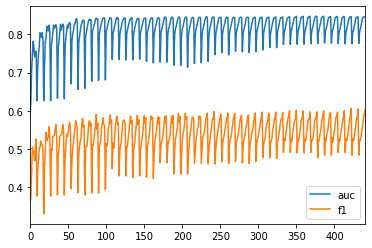

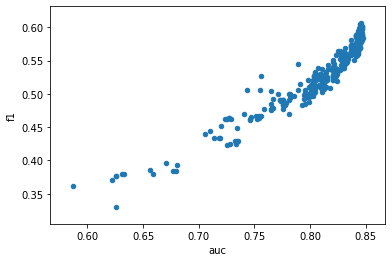

In [30]:
forestPlot = pd.DataFrame({'auc':auc_sc, 'f1':f1_sc})
forestPlot.plot();
forestPlot.plot('auc', 'f1', kind='scatter');
forestPlot

In [31]:
#tweaking parameters for Decision Tree Classifier
best = 0
ind = 0
auc_sc = np.array([])
f1_sc = np.array([])
for index in range(1,50,1):
    treeModel = DecisionTreeClassifier(class_weight = 'balanced',max_depth = index ,random_state = 42)
    
    treeModel.fit(features_train, target_train)
    
    treePrediction = treeModel.predict(features_valid)
    
    f1 = f1_score(target_valid, treePrediction)
    
    f1_sc = np.append(f1_sc, f1)
    
    treePrediction_Proba = treeModel.predict_proba(features_valid)[:,1]
        
    auc_sc = np.append(auc_sc, roc_auc_score(target_valid, treePrediction_Proba)) 

    if f1 > best:
        best = f1
        ind = index
print('best f1 score for Decision Tree on validation set =',best,'with the {} max depth'.format(ind))

best f1 score for Decision Tree on validation set = 0.575712143928036 with the 8 max depth


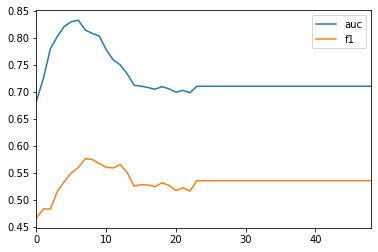

In [32]:
scc = pd.DataFrame({'auc':auc_sc, 'f1':f1_sc})
scc.plot();

<h4>Выполнили 3 вида балансировки классов:</h4>

Увеличение выборки в целом показал лучшие результаты по улучшению метрики F1 в случае с Random Forest Classifier и Logistic Regression, но для Decision Tree Classifier лучшее влияние оказал Class_weight='balanced. Но у увелечении выборки видна тенденция ,что Точность и Полнота примерно сбалансированы относительно друг-друга на всех моделях ,однако примерно та же ситуация у class_weight='balanced у Дерева решений. У уменьшения выборки заметен больший дисбаланс между Точностью и Полнотой, и на всех 3-ех моделях в сторону Полноты.
<br>
<br>
Также изучив измерения AUC относительно F1 можно отметить , что она меняется синхронно с F1 при изменении параметров в случае с RandomForestClassifier ,но наблюдаем абсолютно наоборот в случае с DecisionTreeClassifier , где AUC остается монотонно с изменением параметров.
<br>
<br>
Также так как метрики показали относительно похожие результаты относительно друг-друга, выбрали для подбора гиперпараметров в цикле данные, сбалансированные методом уменьшения выборки. Определяли их результативность по F1 ,так как она является в нашей задаче ключевой метрикой
<br>
<br>
Лучшей моделью на валидационной выборке можно легко назвать Random Forest Regressor , еще до учета гиперпараметров это модель выдает на 0.1+ лучше показатель F1 и также имеет самый высокий AUC_ROC в 0.86 и для нее лучшей балансировкой показала Увелечение выборки

In [33]:
forestModel = RandomForestClassifier(max_depth = 9,n_estimators = 47, random_state = 42)
forestModel.fit(features_downsampled, target_downsampled)
forestDS= modelStats(forestModel, 'valid')
forestDS['balance'] = 'downsampling'
forestModel.fit(features_upsampled, target_upsampled)
forestUS= modelStats(forestModel, 'valid')
forestUS['balance'] = 'upsampling'
forestModel = RandomForestClassifier(class_weight = 'balanced',max_depth = 9,n_estimators = 47, random_state = 42)
forestModel.fit(features_train, target_train)
forestCW = modelStats(forestModel, 'valid')
forestCW['balance'] = 'class_weight'
statsRFC = pd.concat([forestDS,forestUS,forestCW])
statsRFC['model'] = 'Random Forest Classifier'

treeModel = DecisionTreeClassifier(max_depth = 8, random_state = 42)
treeModel.fit(features_downsampled, target_downsampled)
treeDS= modelStats(treeModel, 'valid')
treeDS['balance'] = 'downsampling'
treeModel.fit(features_upsampled, target_upsampled)
treeUS= modelStats(treeModel, 'valid')
treeUS['balance'] = 'upsampling'
treeModel = DecisionTreeClassifier(class_weight = 'balanced',max_depth = 8, random_state = 42)
treeModel.fit(features_train, target_train)
treeCW = modelStats(treeModel, 'valid')
treeCW['balance'] = 'class_weight'
statsDTC = pd.concat([treeDS,treeUS,treeCW])
statsDTC['model'] = 'Decision Tree Classifier'

stats =pd.concat([statsLR,statsRFC,statsDTC])
stats.drop(['Accuracy', 'Precision', 'Recall'], axis = 1,inplace = True)
stats.sort_values(by='F1', ascending = False)

,AUC_ROC,F1,balance,model
0,0.845690,0.606159,upsampling,Random Forest Classifier
0,0.842378,0.585965,class_weight,Random Forest Classifier
0,0.814138,0.575712,class_weight,Decision Tree Classifier
0,0.804438,0.574887,upsampling,Decision Tree Classifier
0,0.842986,0.574501,downsampling,Random Forest Classifier
0,0.787789,0.540230,downsampling,Decision Tree Classifier
0,0.748608,0.481328,downsampling,Logistic Regression
0,0.749442,0.481108,class_weight,Logistic Regression
0,0.749456,0.475248,upsampling,Logistic Regression
0,0.745141,0.259366,дисбаланс,Logistic Regression


# 4. Тестирование модели

In [34]:
#merging 2 datasets into 1 for training purposes and balancing that dataset 

featuress = pd.concat([features_train, features_valid])
targett = pd.concat([target_train, target_valid])
features_downsampled, target_downsampled = downsample(featuress, targett, 0.3)
features_upsampled, target_upsampled = upsample(featuress, targett, 4)

In [35]:
forestModel = RandomForestClassifier(max_depth = 9,n_estimators = 47, random_state = 42)
forestModel.fit(features_downsampled, target_downsampled)
testForestDS = modelStats(forestModel, 'test')
testForestDS['balance'] = 'downsample'

In [36]:
forestModel.fit(features_upsampled, target_upsampled)
testForestUS = modelStats(forestModel, 'test')
testForestUS['balance'] = 'upsample'

In [37]:
forestModel = RandomForestClassifier(class_weight = 'balanced',max_depth = 9,n_estimators = 47, random_state = 42)
forestModel.fit(featuress, targett)
testForestCW = modelStats(forestModel, 'test')
testForestCW['balance'] = 'class_weight'

testForest = pd.concat([testForestDS,testForestUS,testForestCW])
print('Random Forest Classifier test results:')
testForest.sort_values(by = 'F1', ascending = False)

Random Forest Classifier test results:


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.865395,0.626391,0.827713,0.571014,0.693662,downsample
0,0.869135,0.625659,0.843842,0.624561,0.626761,class_weight
0,0.867984,0.621262,0.832845,0.588050,0.658451,upsample


In [38]:
treeModel = DecisionTreeClassifier(max_depth = 8, random_state = 42)
treeModel.fit(features_downsampled, target_downsampled)
testTreeDS = modelStats(treeModel, 'test')
testTreeDS['balance'] = 'downsample'

In [39]:
treeModel.fit(features_upsampled, target_upsampled)
testTreeUS = modelStats(treeModel, 'test')
testTreeUS['balance'] = 'upsample'

In [40]:
treeModel = DecisionTreeClassifier(class_weight = 'balanced',max_depth = 8, random_state = 42)
treeModel.fit(featuress, targett)
testTreeCW = modelStats(treeModel, 'test')
testTreeCW['balance'] = 'class_weight'

testTree = pd.concat([testTreeDS, testTreeUS, testTreeCW])
print('Decision Tree Classifier test results:')
testTree.sort_values(by = 'F1', ascending = False)

Decision Tree Classifier test results:


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.821984,0.579666,0.796921,0.509333,0.672535,downsample
0,0.817819,0.563380,0.772727,0.469484,0.704225,class_weight
0,0.816947,0.562588,0.771994,0.468384,0.704225,upsample


In [41]:
logisModel = LogisticRegression(solver = 'liblinear',random_state = 42)
logisModel.fit(features_downsampled, target_downsampled)
testLogisDS = modelStats(logisModel, 'test')
testLogisDS['balance'] = 'downsample'

In [42]:
logisModel.fit(features_upsampled, target_upsampled)
testLogisUS = modelStats(logisModel, 'test')
testLogisUS['balance'] = 'upsample'

In [43]:
logisModel = LogisticRegression(solver = 'liblinear', class_weight = 'balanced',random_state = 42)
logisModel.fit(featuress, targett)
testLogisCW = modelStats(logisModel, 'test')
testLogisCW['balance'] = 'class_weight'

testLogis = pd.concat([testLogisDS, testLogisUS, testLogisCW])
print('Logistic Regression test results:')
testLogis.sort_values(by = 'F1', ascending = False)

Logistic Regression test results:


,AUC_ROC,F1,Accuracy,Precision,Recall,balance
0,0.777840,0.508941,0.738270,0.417607,0.651408,downsample
0,0.777713,0.495663,0.701613,0.382409,0.704225,class_weight
0,0.777784,0.493252,0.697214,0.378531,0.707746,upsample


Соеденили Тренировочную и Валидационную выборки и сбалансировали их уменьшением и увелечением выборки . Использовали ту же функцию для проверки на тестовой выборке. Свели все данные для каждой из моделей в свой DataFrame. Во всех моделях лучшим способом оказался увелечение выборки для лучшей F1 меры.
<br>
В целом лучшей моделью можно назвать в плане результативности RandomForestClassifier, которая смогла добиться F1 = 0.61  с методом увелечения выборки , в которой также точность 57% и полнота 65%, что говорят о умении модели определять истинно положительные ответы достаточно неплохо и охватывает из них чуть больше половины. 
<br>
Дерево решений также неплохо справилась с заданием и добилась заветных F1 = 0.59,у которой также лучшие результаты с балансировкой методом увелечения выборки,что достаточно странно , ведь подбор гиперпараметров делали по class_weight = 'balanced' ,ибо она показала на валидационной выборки лучшие показатели , у которой точность 52% и полнота 68% ,не сильно отстает от Леса ,но если брать качество ,то эти пару процентов в некоторых случаях могут сыграть большую роль , так что лучше определяться что важнее - скорость или качество. Думаю в данном случае важнее качество ,поэтому фаворитом будет лес
<br>
Логистическая регрессия даже после всех небольших махинация не смогла набрать желанную отметку F1 в 0.59 , а смогла только максимум набрать 0.47 , точность и полнота у нее намного хуже чем у прошлых моделей , данная модель может быть потенциальна ,если нам в задаче была бы не так важна точность , но главной метрикой была бы полнота и скорость ,тогда можно было бы ее использовать
<br>
<br>
Явным фаворитом выступает RandomForestRegressor  с лучшими F1 и AUC_ROC Показателями на увелечении выборки